In [194]:
import numpy as np
import pandas as pd

In [195]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [247]:
RealDataPath="Logging Data/real_data/"
SimulatedDataPath="Logging Data/ideal_data/"

def read_methods_and_litho(PathName):
    Dept=[]
    KS=[]
    PS=[]
    Lit=[]
    for i in range(1,38):
        if i==23:
            continue
        f = open(PathName+str(i)+'.txt', 'r')

        text_data = f.readlines()
        for text_line in text_data:
            data=text_line.split('\t')
            Dept=np.append(Dept,float(data[0]))
            KS=np.append(KS,float(data[1]))
            PS=np.append(PS,float(data[2]))
            Lit=np.append(Lit,int(data[3]))
    return Dept, KS, PS, Lit
    
Dept_r, KS_r, PS_r, Lit_r =read_methods_and_litho(RealDataPath)
Dept_s, KS_s, PS_s, Lit_s =read_methods_and_litho(SimulatedDataPath)

In [198]:
data={'Dept':Dept_r, 'KS':KS_r,'PS':PS_r,'Lit':Lit_r}

In [199]:
df=pd.DataFrame(data)
print(df)

        Dept     KS    PS   Lit
0      365.8  10.12  11.6   3.0
1      365.9   9.96  10.4   3.0
2      366.0   9.92   9.9   3.0
3      366.1  10.05  10.0   3.0
4      366.2  10.30  10.7   3.0
...      ...    ...   ...   ...
54831  508.7   9.25  97.4  66.0
54832  508.8   9.29  97.3  66.0
54833  508.9   9.59  97.3  66.0
54834  509.0   9.80  97.3  66.0
54835  509.1  10.00  97.3  66.0

[54836 rows x 4 columns]


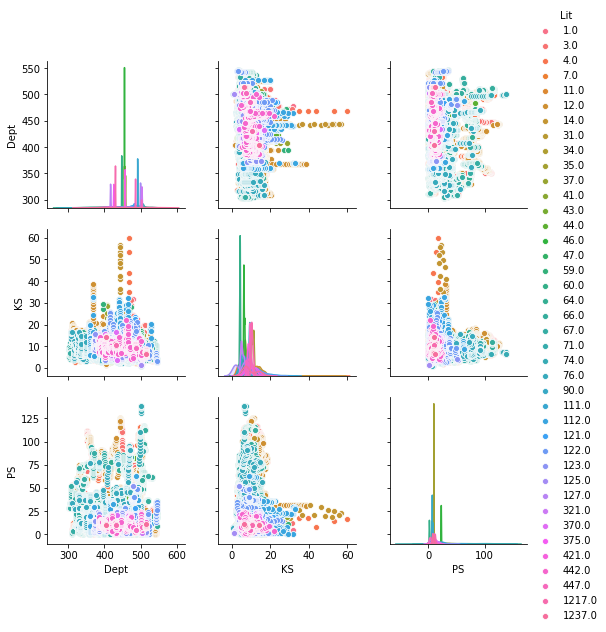

In [100]:
sns.pairplot( data=df, vars=('Dept','KS','PS'), hue='Lit' )

In [200]:
new_list=[]
for i in range (len(df.Lit)):
    new_list.append(int(str(df.Lit[i])[:1]))

In [201]:
df.insert(2, "nLit", new_list, True) 

In [204]:
df.head(-1)

,Dept,KS,nLit,PS,Lit
0,365.8,10.12,3,11.6,3.0
1,365.9,9.96,3,10.4,3.0
2,366.0,9.92,3,9.9,3.0
3,366.1,10.05,3,10.0,3.0
4,366.2,10.30,3,10.7,3.0
...,...,...,...,...,...
54830,508.6,9.29,6,97.3,66.0
54831,508.7,9.25,6,97.4,66.0
54832,508.8,9.29,6,97.3,66.0
54833,508.9,9.59,6,97.3,66.0


In [205]:
data1 = pd.DataFrame.from_dict(data)

In [206]:
df_norm = data1[['Dept', 'KS', 'PS']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(5)

,Dept,KS,PS
34226,0.634006,0.127717,0.331400
25896,0.682174,0.282609,0.014503
51842,0.371758,0.238961,0.073387
28736,0.781803,0.120075,0.061566
25722,0.610539,0.119226,0.102973


In [184]:
df.head(-1)

,Dept,KS,nLit,new_Lit,PS,Lit
0,365.8,10.12,3,3,11.6,3.0
1,365.9,9.96,3,3,10.4,3.0
2,366.0,9.92,3,3,9.9,3.0
3,366.1,10.05,3,3,10.0,3.0
4,366.2,10.30,3,3,10.7,3.0
...,...,...,...,...,...,...
54830,508.6,9.29,6,6,97.3,66.0
54831,508.7,9.25,6,6,97.4,66.0
54832,508.8,9.29,6,6,97.3,66.0
54833,508.9,9.59,6,6,97.3,66.0


In [208]:
df.nLit.unique().tolist()

[3, 1, 4, 7, 6, 5, 9]

In [209]:
train, test = train_test_split(df, test_size = 0.3)
trainX = train[['Dept', 'KS', 'PS']]# taking the training data features
trainY=train.nLit# output of our training data
testX= test[['Dept', 'KS', 'PS']] # taking test data features
testY =test.nLit   #output value of test data
trainX.head(5)

,Dept,KS,PS
50549,454.9,6.86,7.15
36311,310.7,11.13,52.40
35911,468.1,6.94,18.90
15619,475.3,8.87,5.00
36318,311.4,13.60,48.50


In [210]:
trainY.head(5)

50549    7
36311    3
35911    4
15619    1
36318    3
Name: nLit, dtype: int64

In [222]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [223]:
clf.fit(trainX, trainY)
y_pred = clf.predict(testX)

Iteration 1, loss = 4.13311035
Iteration 2, loss = 1.42469174
Iteration 3, loss = 1.40974768
Iteration 4, loss = 1.40180166
Iteration 5, loss = 1.39077595
Iteration 6, loss = 1.38341111
Iteration 7, loss = 1.37121938
Iteration 8, loss = 1.36292008
Iteration 9, loss = 1.36096990
Iteration 10, loss = 1.35113653
Iteration 11, loss = 1.35046806
Iteration 12, loss = 1.34318393
Iteration 13, loss = 1.33840576
Iteration 14, loss = 1.33279665
Iteration 15, loss = 1.33792754
Iteration 16, loss = 1.33064475
Iteration 17, loss = 1.33199754
Iteration 18, loss = 1.33101824
Iteration 19, loss = 1.32587518
Iteration 20, loss = 1.32286349
Iteration 21, loss = 1.31964528
Iteration 22, loss = 1.32081594
Iteration 23, loss = 1.32068445
Iteration 24, loss = 1.31925626
Iteration 25, loss = 1.31800171
Iteration 26, loss = 1.31695797
Iteration 27, loss = 1.31599051
Iteration 28, loss = 1.31346065
Iteration 29, loss = 1.31436548
Iteration 30, loss = 1.31315084
Iteration 31, loss = 1.31259456
Iteration 32, los

In [224]:
prediction = clf.predict(testX)
print(prediction)

[3 1 3 ... 1 3 3]


In [225]:
print(testY.values)

[4 1 3 ... 4 3 4]


In [226]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(y_pred,testY))

The accuracy of the Multi-layer Perceptron is: 0.4973557838429275


In [227]:
df_norm.insert(2, "nLit", new_list, True) 

In [228]:
df_norm

,Dept,KS,nLit,PS
0,0.258543,0.157948,3,0.083394
1,0.258954,0.155231,3,0.074692
2,0.259366,0.154552,3,0.071066
3,0.259778,0.156760,3,0.071791
4,0.260189,0.161005,3,0.076867
...,...,...,...,...
54831,0.846851,0.143173,6,0.705584
54832,0.847262,0.143852,6,0.704859
54833,0.847674,0.148947,6,0.704859
54834,0.848086,0.152514,6,0.704859


In [229]:
train, test = train_test_split(df_norm, test_size = 0.3)
trainX = train[['Dept', 'KS', 'PS']]# taking the training data features
trainY=train.nLit# output of our training data
testX= test[['Dept', 'KS', 'PS']] # taking test data features
testY =test.nLit   #output value of test data
trainX.head(5)

,Dept,KS,PS
10981,0.681350,0.097317,0.061639
45973,0.171676,0.246773,0.074184
24699,0.758748,0.094769,0.133430
22944,0.662001,0.206012,0.099347
16778,0.573487,0.113281,0.076867


In [230]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [231]:
clf.fit(trainX, trainY)
y_pred = clf.predict(testX)

Iteration 1, loss = 1.66694125
Iteration 2, loss = 1.48784849
Iteration 3, loss = 1.45921854
Iteration 4, loss = 1.44922549
Iteration 5, loss = 1.44435302
Iteration 6, loss = 1.44145194
Iteration 7, loss = 1.43958355
Iteration 8, loss = 1.43795458
Iteration 9, loss = 1.43639369
Iteration 10, loss = 1.43500821
Iteration 11, loss = 1.43355856
Iteration 12, loss = 1.43198039
Iteration 13, loss = 1.43031548
Iteration 14, loss = 1.42852427
Iteration 15, loss = 1.42672170
Iteration 16, loss = 1.42468152
Iteration 17, loss = 1.42231480
Iteration 18, loss = 1.42005224
Iteration 19, loss = 1.41724477
Iteration 20, loss = 1.41421292
Iteration 21, loss = 1.41084509
Iteration 22, loss = 1.40685448
Iteration 23, loss = 1.40246746
Iteration 24, loss = 1.39745082
Iteration 25, loss = 1.39162518
Iteration 26, loss = 1.38516413
Iteration 27, loss = 1.37776299
Iteration 28, loss = 1.36995810
Iteration 29, loss = 1.36101156
Iteration 30, loss = 1.35185767
Iteration 31, loss = 1.34235918
Iteration 32, los

/Users/assanov.z/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [232]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(y_pred,testY))

The accuracy of the Multi-layer Perceptron is: 0.5465929122849674


In [242]:
len(trainY)

38385

In [245]:
len(testY)

16451

In [244]:
len(y_pred)

16451

In [246]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predictions = clf.predict(testX)
labels=[1,3,4,5,6,7]
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.58      0.62      4767
           3       0.52      0.78      0.62      6495
           4       0.41      0.05      0.09      2429
           5       0.00      0.00      0.00        60
           6       0.51      0.32      0.40      1360
           7       0.45      0.44      0.45      1339
           9       0.00      0.00      0.00         1

    accuracy                           0.55     16451
   macro avg       0.36      0.31      0.31     16451
weighted avg       0.54      0.55      0.51     16451



/Users/assanov.z/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
